In [72]:
cnfl=[true]
include("PVCR.jl");

In [73]:
include("functions/plotting_base_gd.jl")

plot_segmented_tariff_category_with_regression (generic function with 3 methods)

In [74]:
# Read in all of the utility bills for the various utilities and tariff types
base_GD = CSV.read("data/Base_GD.csv")

# Narrow down to {Residential | Commerical Industrial | Medium Voltage} CNFL customers

all_cnfl = filter(row -> (!ismissing(row.EMPRESA) && row.EMPRESA == "CNFL"), base_GD)

6923×17 DataFrame. Omitted printing of 13 columns
│ Row  │ ANNO  │ MES   │ ENERGIA_GENERADA │ ENERGIA_DEPOSITADA │
│      │ Int64 │ Int64 │ Float64⍰         │ Float64⍰           │
├──────┼───────┼───────┼──────────────────┼────────────────────┤
│ 1    │ 2018  │ 1     │ 209.0            │ 117.0              │
│ 2    │ 2018  │ 2     │ 235.0            │ 122.0              │
│ 3    │ 2018  │ 3     │ 305.0            │ 169.0              │
│ 4    │ 2018  │ 4     │ 355.0            │ 217.0              │
│ 5    │ 2018  │ 5     │ 338.0            │ 185.0              │
│ 6    │ 2018  │ 1     │ 432.0            │ 296.0              │
│ 7    │ 2018  │ 2     │ 482.0            │ 323.0              │
│ 8    │ 2018  │ 3     │ 614.0            │ 448.0              │
│ 9    │ 2018  │ 4     │ 710.0            │ 547.0              │
│ 10   │ 2018  │ 5     │ 686.0            │ 458.0              │
⋮
│ 6913 │ 2017  │ 12    │ 381.0            │ 225.0              │
│ 6914 │ 2017  │ 12    │ 2.0              │ 0.0                │
│ 6915 │ 2017  │ 12    │ 2770.0           │ 0.0                │
│ 6916 │ 2017  │ 12    │ 5011.0           │ 0.0                │
│ 6917 │ 2017  │ 12    │ 2175.0           │ 0.0                │
│ 6918 │ 2017  │ 12    │ 2.0              │ 0.0                │
│ 6919 │ 2017  │ 12    │ 2165.0           │ 370.0              │
│ 6920 │ 2017  │ 12    │ 2493.0           │ 720.0              │
│ 6921 │ 2017  │ 12    │ 117.0            │ 65.0               │
│ 6922 │ 2017  │ 12    │ 4277.0           │ 0.0                │
│ 6923 │ 2017  │ 12    │ 1160.0           │ 0.0                │

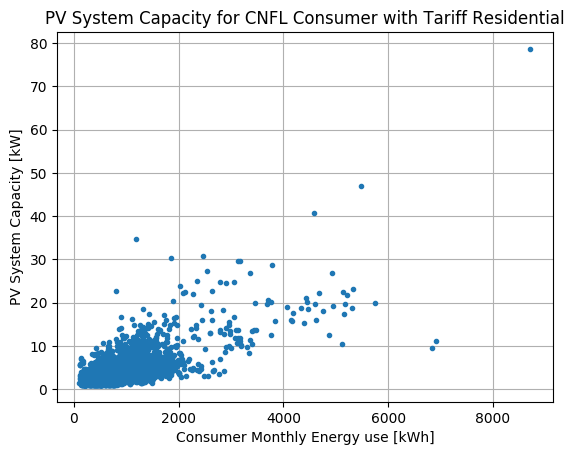

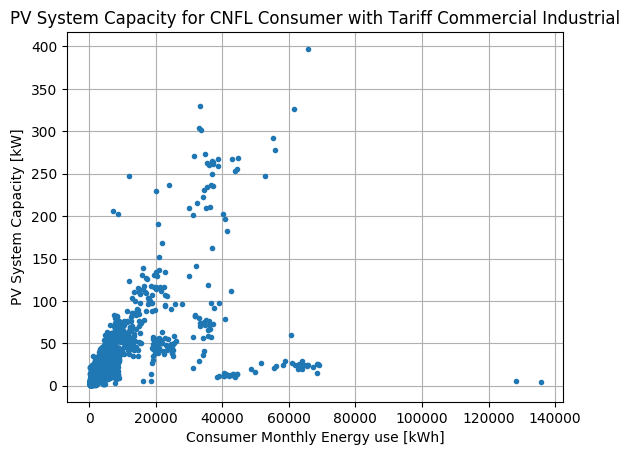

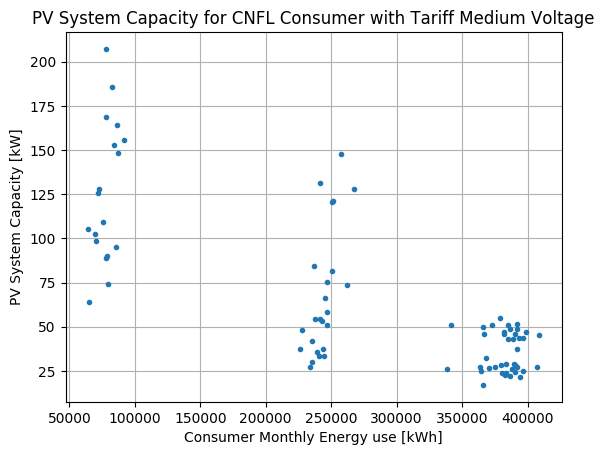

In [75]:
plot_all_tariffs_per_company(all_cnfl, "CNFL")

In [76]:
# Compare this real-world data with the predicted adoption of the economically rational model in Notebook 4

# Residential
consumption_1 = 100:100:1500
res_model_predictions = []
for (ix, co) in enumerate(consumption_1)
    cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
    res = optimal_pv(cnfl_residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    push!(res_model_predictions, res[1][2])
end

consumption_2 = 2000:500:4000
for (ix, co) in enumerate(consumption_2)
    cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
    res = optimal_pv(cnfl_residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    push!(res_model_predictions, res[1][2])
end

res_consumption = vcat(consumption_1, consumption_2)

20-element Array{Int64,1}:
  100
  200
  300
  400
  500
  600
  700
  800
  900
 1000
 1100
 1200
 1300
 1400
 1500
 2000
 2500
 3000
 3500
 4000

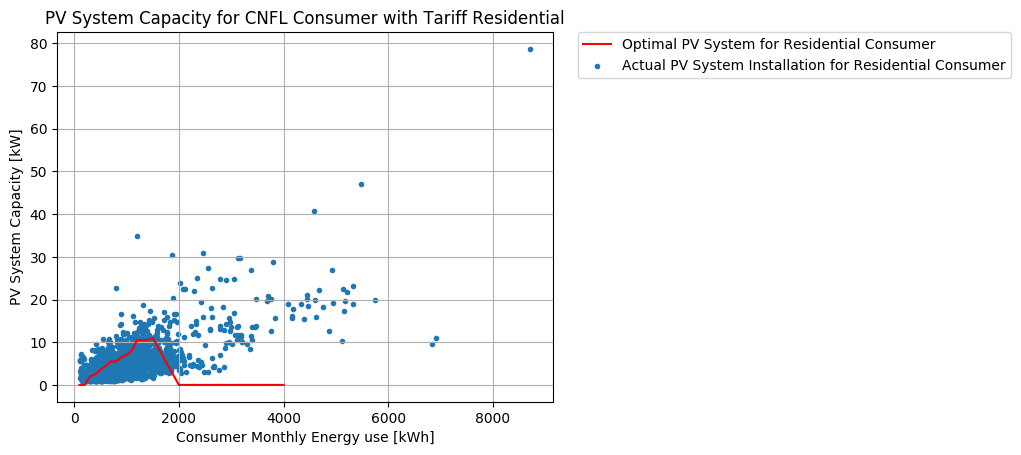

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [77]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, res_model_predictions)

In [78]:
# Commerical Industrial
consumption1 = 100:100:1000
comind_model_predictions = []
for (ix, co) in enumerate(consumption1)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVRes, 0.0:10:100, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

consumption2 = 2000:1000:10000
for (ix, co) in enumerate(consumption2)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVRes, 0.0:10:200, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

consumption3 = 20000:10000:60000
for (ix, co) in enumerate(consumption3)
    cnfl_industrial.econsumption = co; get_pmax(cnfl_industrial);
    res = optimal_pv(cnfl_industrial, PVRes, 0.0:20:300, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

comind_consumption = vcat(consumption1, consumption2, consumption3);

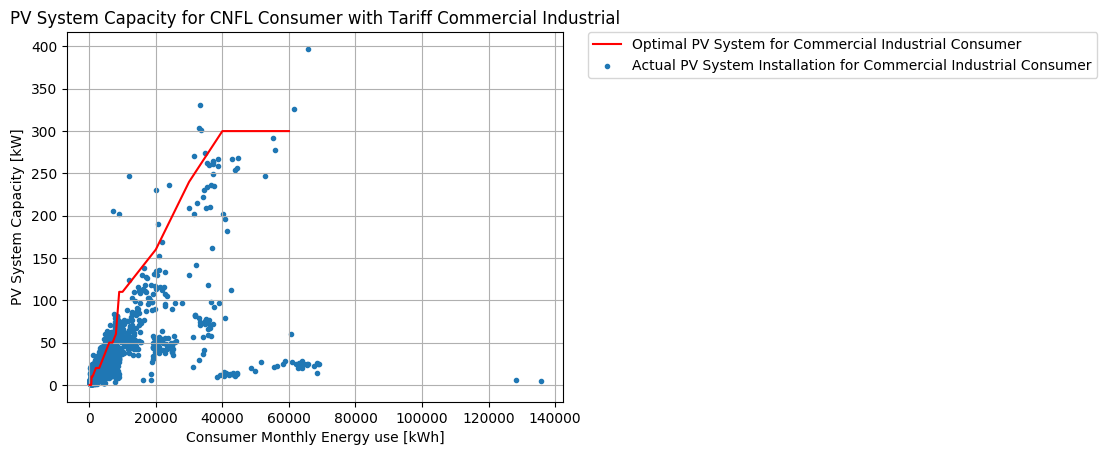

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Commercial Industrial')

In [79]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Commercial Industrial", "CNFL", comind_consumption, comind_model_predictions)

In [80]:
# Medium Voltage
consumption1 = 500:500:10000
tmt_model_predictions = []
for (ix, co) in enumerate(consumption1)
    cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    res = optimal_pv(cnfl_mediumvoltage, PVRes, 0.0:50:200, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

consumption2 = 10000:1000:200000
for (ix, co) in enumerate(consumption2)
    cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    res = optimal_pv(cnfl_mediumvoltage, PVRes, 0.0:50:200, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

consumption3 = 200000:100000:600000
for (ix, co) in enumerate(consumption3)
    cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    res = optimal_pv(cnfl_mediumvoltage, PVRes, 0.0:50:200, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

tmt_consumption = vcat(consumption1, consumption2, consumption3);

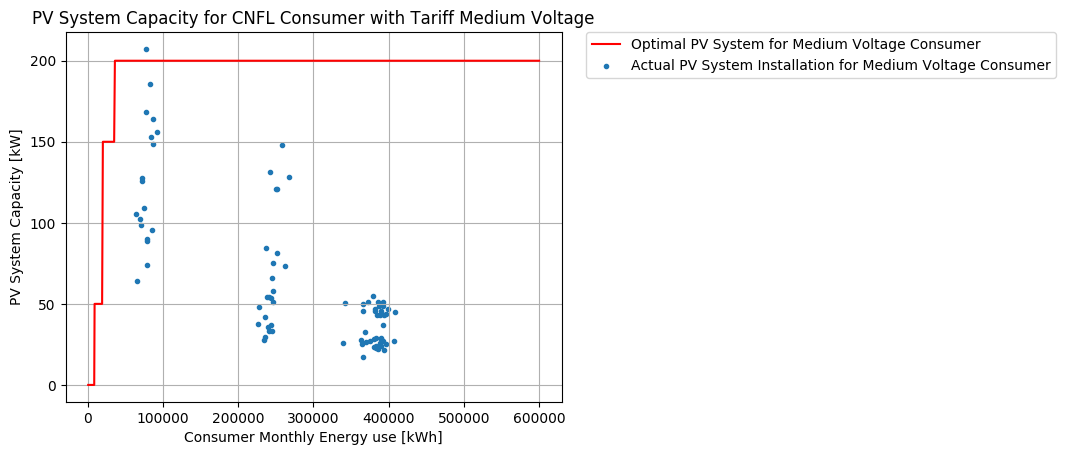

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Medium Voltage')

In [81]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Medium Voltage", "CNFL", tmt_consumption, tmt_model_predictions)

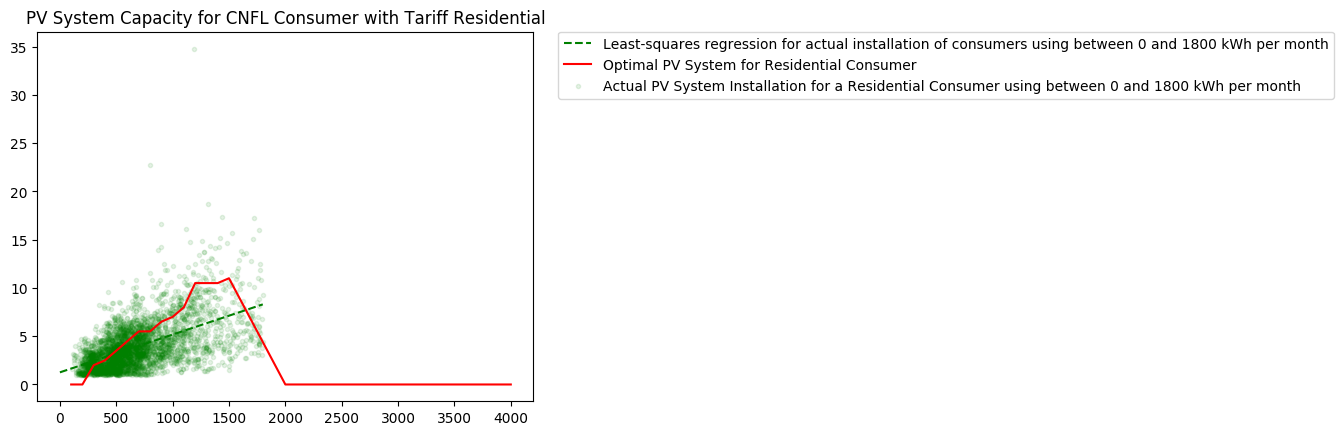

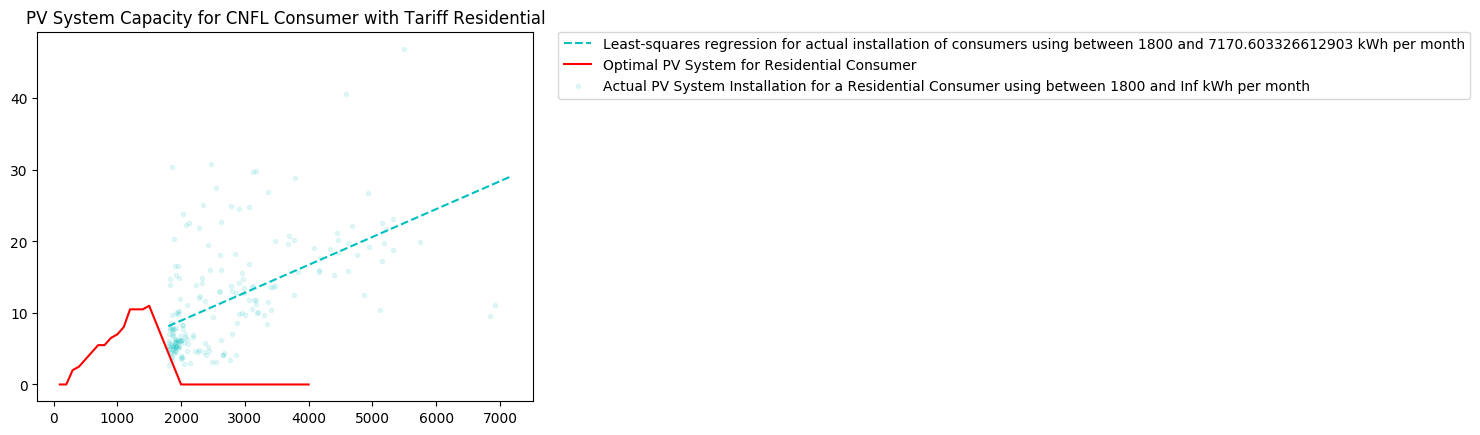

In [82]:
plot_tariff_category_with_many_regressions(all_cnfl, "Residential", "CNFL", res_consumption, res_model_predictions, [1800])

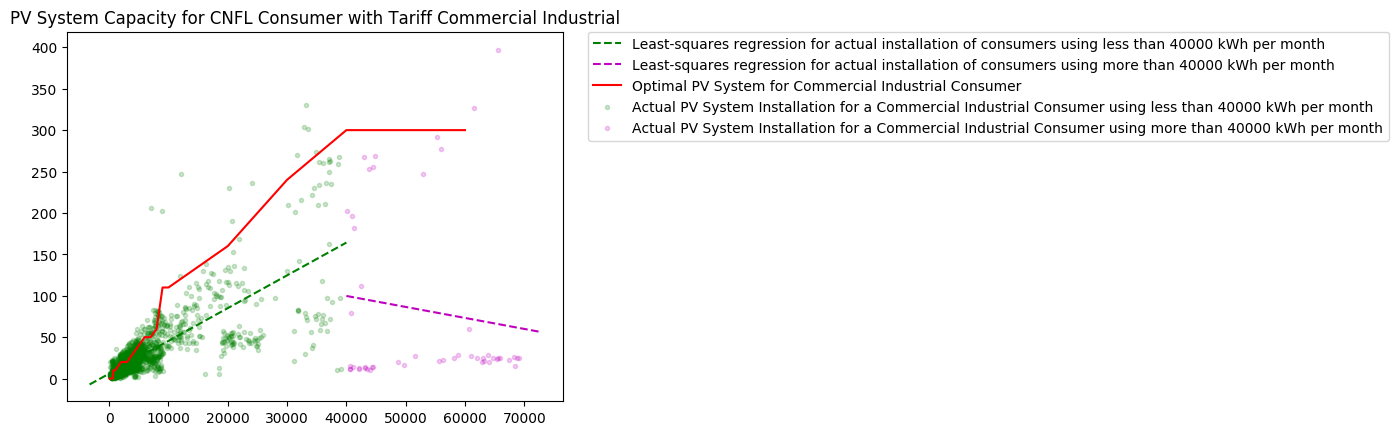

PyObject <matplotlib.legend.Legend object at 0x13ab2b0b8>

In [83]:
plot_tariff_category_with_two_regressions(all_cnfl, "Commercial Industrial", "CNFL", comind_consumption, comind_model_predictions, 40000)

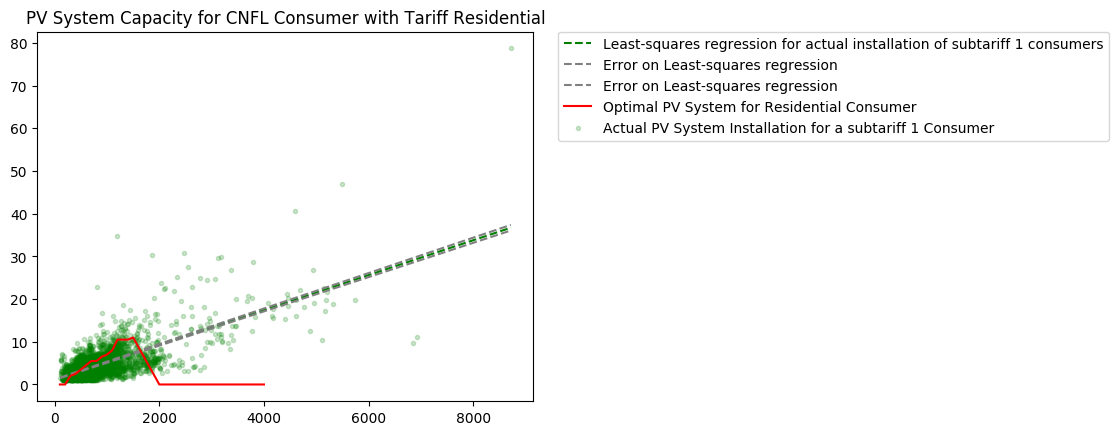

In [84]:
plot_with_subtariff_wise_regression(all_cnfl, "Residential", "CNFL", res_consumption, res_model_predictions)

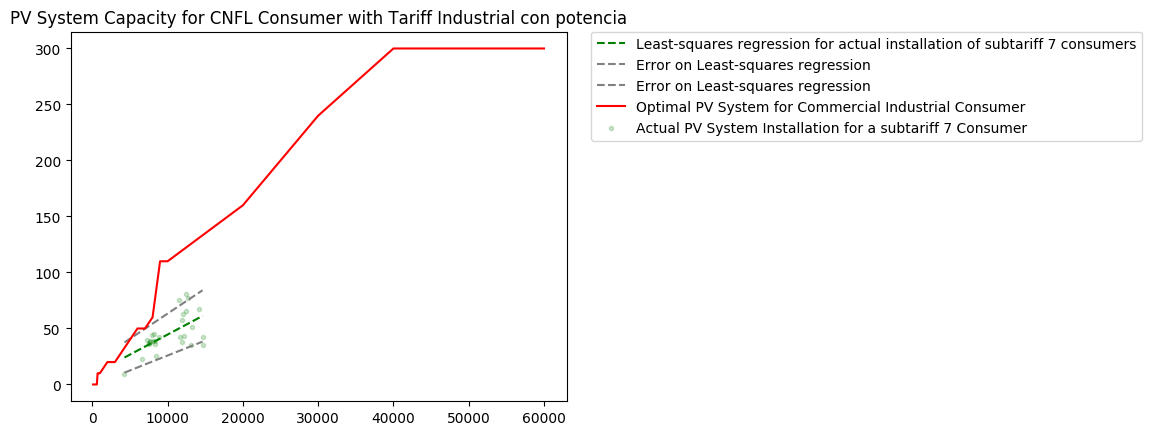

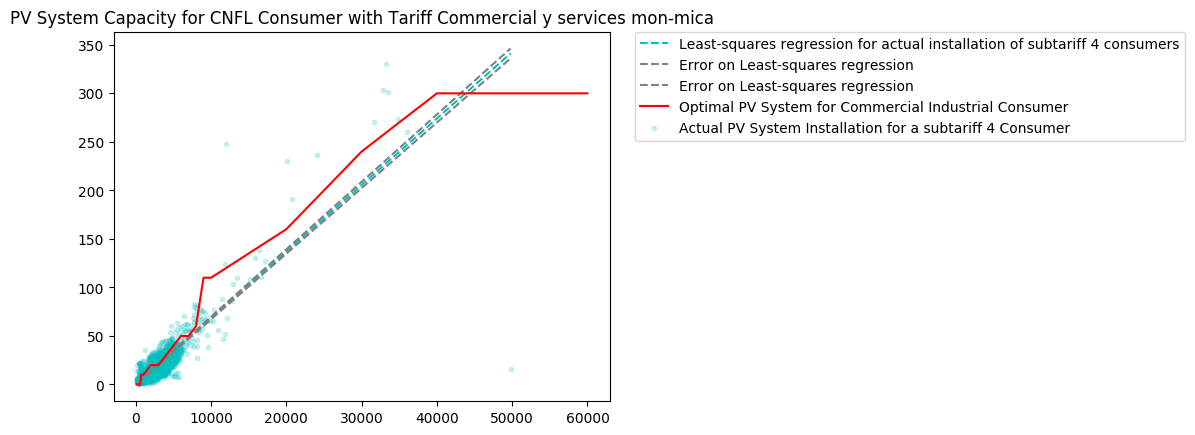

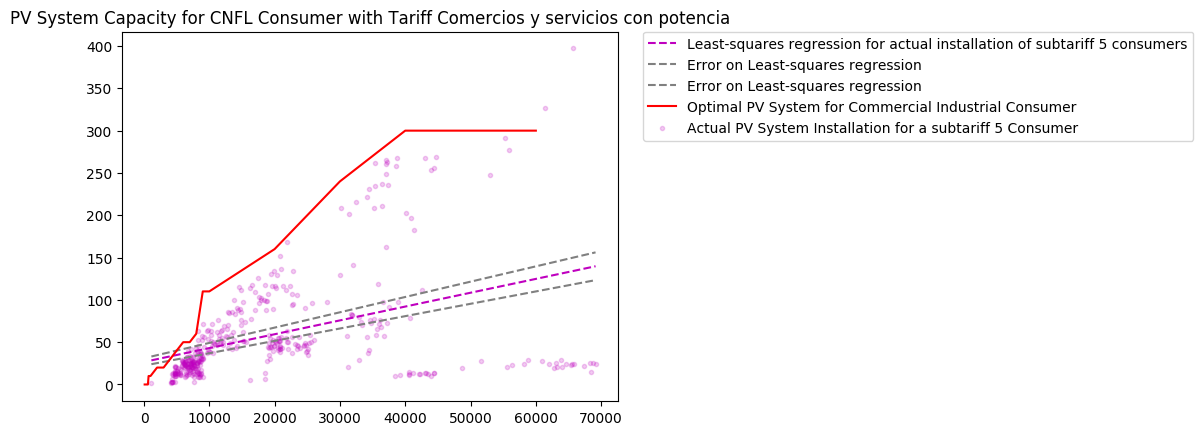

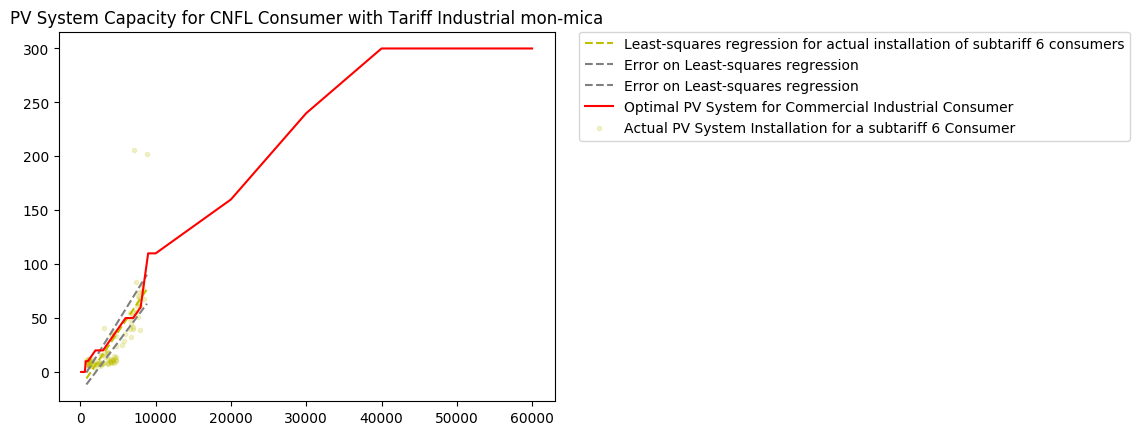

In [85]:
plot_with_subtariff_wise_regression(all_cnfl, "Commercial Industrial", "CNFL", comind_consumption, comind_model_predictions)

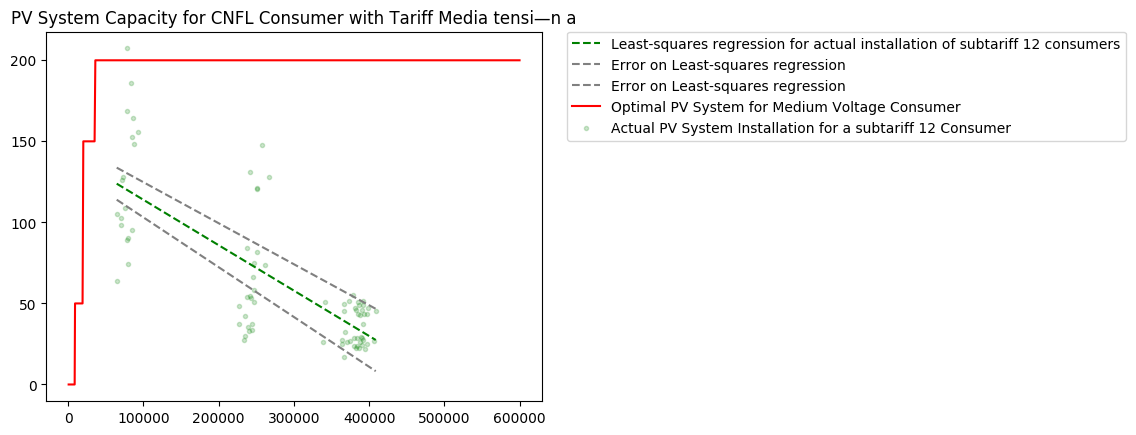

In [86]:
plot_with_subtariff_wise_regression(all_cnfl, "Medium Voltage", "CNFL", tmt_consumption, tmt_model_predictions)

In [1]:
using PyCall
using PyPlot
py"""
import sys
sys.path.insert(0, "./functions")
"""
plot_mc_coords_py = pyimport("nsrdb_python")["plot_mc_coords"];
println(plot_mc_coords_py)

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/arnavgautam/.julia/packages/PyPlot/4wzW1/src/init.jl:192
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[1]:7
└ @ Core In[1]:7


PyObject <function plot_mc_coords at 0x134e4a730>


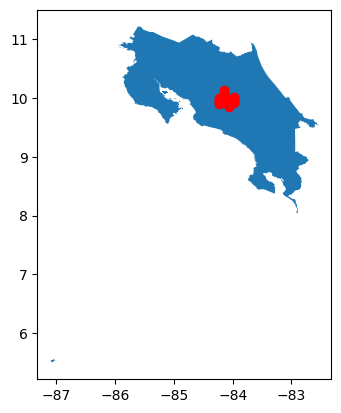

In [4]:
plot_mc_coords_py("data/monte_carlo_data/CNFL_36_COORDS.txt")

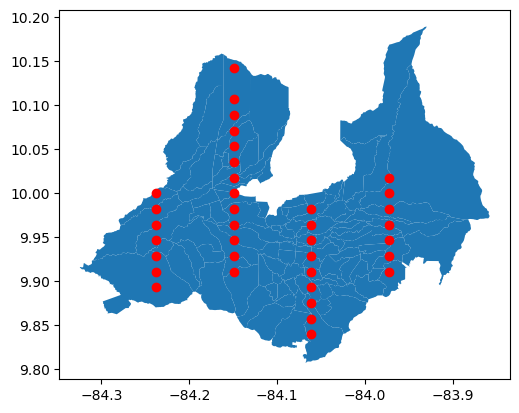

In [3]:
plot_mc_coords_py("data/monte_carlo_data/CNFL_36_COORDS.txt",cnfl=true)